In [2]:
import specular
import numpy as np
import matplotlib.pyplot as plt

print(specular.__version__)

0.7.2


## 2. Numerical ordinary differential equations

### 2.1 Classical schemes

In [3]:
def F(t, u):
   return -3*u 

specular.ode.classical_scheme(F=F, u_0=1.0, t_0=0.0, T=2.0, h=0.1, scheme="explicit Euler")

Running the explicit Euler scheme: 100%|██████████| 20/20 [00:00<?, ?it/s]


In [4]:
def F(t, u):
   return -3*u 

specular.ode.classical_scheme(F=F, u_0=1.0, t_0=0.0, T=2.0, h=0.1, scheme="explicit Euler").values()

Running the explicit Euler scheme: 100%|██████████| 20/20 [00:00<?, ?it/s]


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 array([1.00000000e+00, 7.00000000e-01, 4.90000000e-01, 3.43000000e-01,
        2.40100000e-01, 1.68070000e-01, 1.17649000e-01, 8.23543000e-02,
        5.76480100e-02, 4.03536070e-02, 2.82475249e-02, 1.97732674e-02,
        1.38412872e-02, 9.68890104e-03, 6.78223073e-03, 4.74756151e-03,
        3.32329306e-03, 2.32630514e-03, 1.62841360e-03, 1.13988952e-03,
        7.97922663e-04]))

Running the explicit Euler scheme: 100%|██████████| 200/200 [00:00<?, ?it/s]


Figure saved: figures\explicit-Euler


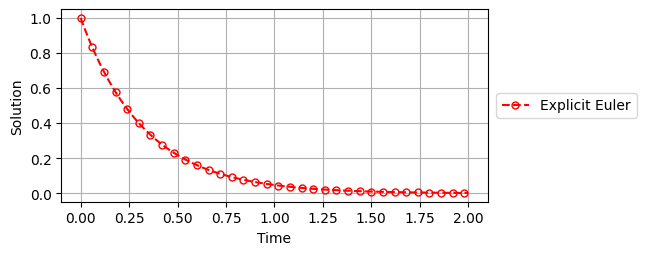

In [5]:
def F(t, u):
    return -3*u 

specular.ode.classical_scheme(F=F, u_0=1.0, t_0=0.0, T=2.0, h=0.01, scheme="explicit Euler").visualization(save_path="explicit-Euler")

In [6]:
t_0 = 0.0
T = 2.5
h = 0.1

def F(t, u):
    return -3*u 

def exact_sol(t):
    return np.exp(-3*t)

def u_0(t_0):
    return exact_sol(t_0)

specular.ode.solver.classical_scheme(F=F, t_0=t_0, u_0=u_0, T=T, h=h, scheme="explicit Euler").table(exact_sol=exact_sol)

Running the explicit Euler scheme: 100%|██████████| 25/25 [00:00<?, ?it/s]


,Numerical solution,Exact solution,Error
Time,,,
0.0,1.000000,1.000000,0.000000
0.1,0.700000,0.740818,0.040818
0.2,0.490000,0.548812,0.058812
0.3,0.343000,0.406570,0.063570
0.4,0.240100,0.301194,0.061094
0.5,0.168070,0.223130,0.055060
0.6,0.117649,0.165299,0.047650
0.7,0.082354,0.122456,0.040102
0.8,0.057648,0.090718,0.033070


In [7]:
def F(t, u):
    return -(t*u)/(1-t**2)
 
def exact_sol(t):
    return np.sqrt(1 - t**2)
     
def u_0(t_0):
    return exact_sol(t_0)

specular.ode.solver.classical_scheme(F=F, t_0=0.0, u_0=u_0, T=0.9, h=0.01, scheme="implicit Euler").table(exact_sol=exact_sol, save_path="implicit-Euler")

Running the implicit Euler scheme: 100%|██████████| 90/90 [00:00<?, ?it/s]

Table saved: tables\implicit-Euler.csv


,Numerical solution,Exact solution,Error
Time,,,
0.00,1.000000,1.000000,0.000000
0.01,0.999900,0.999950,0.000050
0.02,0.999700,0.999800,0.000100
0.03,0.999400,0.999550,0.000150
0.04,0.999000,0.999200,0.000200
...,...,...,...
0.86,0.504465,0.510294,0.005829
0.87,0.487036,0.493052,0.006016
0.88,0.468751,0.474974,0.006223


Running Crank-Nicolson scheme: 100%|██████████| 90/90 [00:00<00:00, 90049.47it/s]


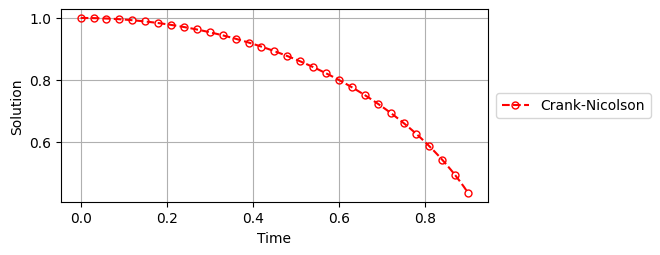

,Numerical solution
Time,
0.00,1.000000
0.01,0.999950
0.02,0.999800
0.03,0.999550
0.04,0.999200
...,...
0.86,0.510250
0.87,0.493003
0.88,0.474918


In [8]:
def F(t, u):
    return -(t*u)/(1-t**2)
 
def u_0(t_0):
    return exact_sol(t_0)

specular.ode.solver.classical_scheme(F=F, t_0=0.0, u_0=u_0, T=0.9, h=0.01, scheme="Crank-Nicolson").visualization().table()

Running Crank-Nicolson scheme: 100%|██████████| 90/90 [00:00<00:00, 89835.16it/s]


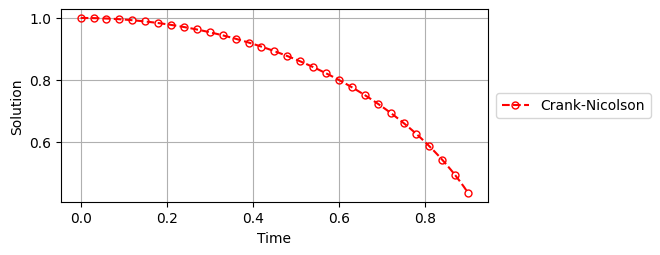

,Numerical solution
Time,
0.00,1.000000
0.01,0.999950
0.02,0.999800
0.03,0.999550
0.04,0.999200
...,...
0.86,0.510250
0.87,0.493003
0.88,0.474918


In [9]:
specular.ode.solver.classical_scheme(F=F, t_0=0.0, u_0=u_0, T=0.9, h=0.01, scheme="Crank-Nicolson").visualization().table()

### 2.2 Specular Euler scheme

Running the specular Euler scheme of Type 1: 100%|██████████| 24/24 [00:00<?, ?it/s]


Figure saved: figures\specular-Euler-scheme-of-Type-1


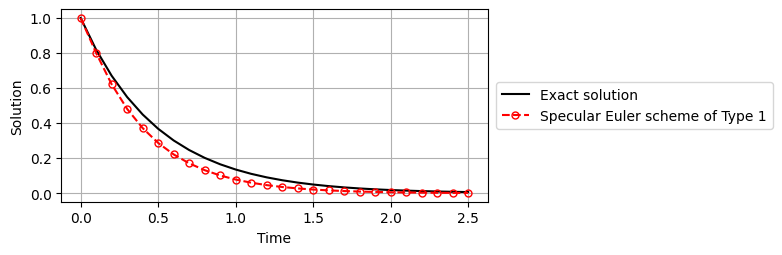

In [23]:
def F(t, u):
    return -2*u 

def exact_sol(t):
    return np.exp(-2*t)

def u_0(t_0):
    return exact_sol(t_0)

specular.Euler_scheme(of_Type='1', F=F, t_0=0.0, u_0=u_0, T=2.5, h=0.1).visualization(exact_sol=exact_sol, save_path="specular-Euler-scheme-of-Type-1")

Running the specular Euler scheme of Type 6: 100%|██████████| 25/25 [00:00<?, ?it/s]


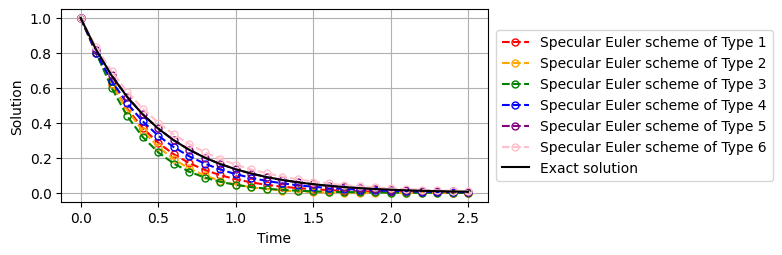

In [24]:
def F(t, u):
    return -2*u 

def exact_sol(t):
    return np.exp(-2*t)

def u_0(t_0):
    return exact_sol(t_0)

plt.figure(figsize=(5.5, 2.5))

colors = ['red', 'orange', 'green', 'blue', 'purple', 'pink']

for i in range(1, 7):
    result = specular.Euler_scheme(of_Type=i, F=F, t_0=0.0, u_0=u_0, T=2.5, h=0.1).values()
    number_of_circles = max(1, len(result[0]) // 30)
    plt.plot(result[0], result[1], linestyle='--', marker='o', color=colors[i-1], markersize=5, markevery=number_of_circles, markerfacecolor='none', markeredgewidth=1.0, label=f'Specular Euler scheme of Type {i}')

exact_values = np.array([exact_sol(t) for t in result[0]])

plt.plot(result[0], exact_values, color='black', label='Exact solution')

plt.xlabel(r"Time", fontsize=10)
plt.ylabel(r"Solution", fontsize=10)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0., fontsize=10)
plt.savefig('figures/specular-Euler-schemes', dpi=1000, bbox_inches='tight')
plt.show()



### 2.3 Specular trigonometric scheme

Running specular trigonometric scheme: 100%|██████████| 24/24 [00:00<?, ?it/s]


Figure saved: figures\specular-trigonometric


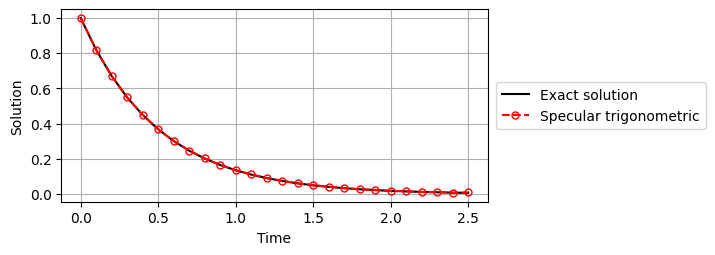

In [25]:
def F(t, u):
    return -2*u 

def exact_sol(t):
    return np.exp(-2*t)

def u_0(t_0):
    return exact_sol(t_0)

u_1 = exact_sol(t_0 + h)

specular.trigonometric_scheme(F=F, t_0=0.0, u_0=u_0, u_1=u_1, T=2.5, h=0.1).visualization(exact_sol=exact_sol, save_path="specular-trigonometric")